In [28]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from dolfin import *

In [82]:
mesh = Mesh("shell.xml")
#PolygonalMeshGenerator.generate(mesh, "ball.off", 0.05)

In [83]:
n_steps = 10
dt = 10./n_steps

#mesh = RectangleMesh(Point(-1, -1), Point(1, 1), 100, 100)
V = FunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

u0 = Constant(0)
f = Constant(0)
a = u*v*dx + dt*inner(grad(u), grad(v))*dx 
L = u0*v*dx + dt*f*v*dx
bc = DirichletBC(V, Constant(0), DomainBoundary())
A, b = assemble_system(a, L, bc)

vtkfile = File('sphere_diffusion.pvd')
u = Function(V)
t = 0
for step in range(n_steps):
    t += dt

    for i in range(10): 
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        z = np.random.uniform(-1,1)
        length = np.sqrt(x*x + y*y + z*z)
        x /= length
        y /= length        
        z /= length
        x *= 40
        y *= 40
        z *= 40
        delta = PointSource(V, Point(x, y, z), 1)
        delta.apply(b)
    solve(A, u.vector(), b)

    #plot(u, interactive=True)
    vtkfile << (u, t)
    
    # reset rhs
    b.zero()
    bc.apply(b) 

In [84]:
u(42,0,0)

0.0

In [42]:
x = np.linspace(-1,1,100)*0.1
y = np.linspace(-1,1,100)*0.1
z = np.linspace(-1,1,100)*0.1
uu = []
for xx in x:
    for yy in y:
        for zz in z:
            uu.append(u(xx,yy,zz))
uu = np.array(uu).reshape((100,100,100))

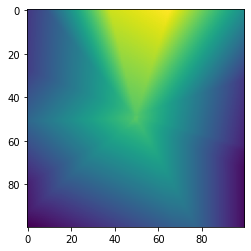

In [57]:
plt.imshow(uu[50,:,:])

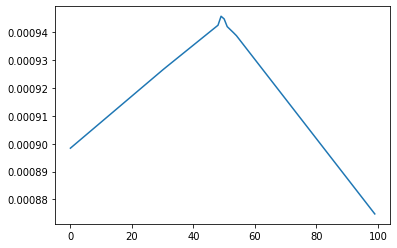

In [58]:
plt.plot(uu[50,50,:])

In [69]:
c = mesh.coordinates()
d = mesh.data()

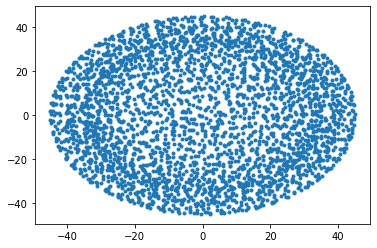

In [70]:
plt.plot(c[:,0], c[:,1], '.')

In [62]:
V_vec = VectorFunctionSpace(mesh, "CG", 1)

In [63]:
h = project(grad(u),V_vec)

In [65]:
h(0,0,40)

array([ 4.19949032e-09, -5.68303656e-08,  4.75165231e-08])

In [18]:
u = u*2

In [21]:
u2 = project(u, V)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [23]:
u2(0,0,0)

0.012647918039459471

In [43]:
grad(u)

Grad(Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', tetrahedron, 1), dim=3), 193), FiniteElement('Lagrange', tetrahedron, 1)), 232))